# One-dimensional solver application tutorial

This tutorial gives a practical overview of the one-dimensional solver application class [OneDimSolverApp](../../../rst/api_reference/generated/eradiate.solvers.onedim.app.OneDimSolverApp.rst). This application simulates radiative transfer in a one-dimensional scene with an atmosphere.

<div class="alert alert-info">

This tutorial is available as a Jupyter notebook in the Eradiate codebase 
[`$ERADIATE_DIR/resources/data/notebooks/tutorials/onedim_solver_app/onedim_solver_app.ipynb`].

</div>

## Instantiation and configuration

We start by importing the `OneDimSolverApp` class:

In [1]:
from eradiate.solvers.onedim.app import OneDimSolverApp

All Eradiate applications are configured with dictionaries. The following dictionary configures a `OneDimSolverApp` instance for a monochromatic simulation with a RPV surface with default parameters.

In [2]:
config = {
    "mode": {
        "type": "mono",
        "wavelength": 577.
    },
    "surface": {
        "type": "rpv"
    },
    "atmosphere": {
        "type": "rayleigh_homogeneous",
        "height": 120.,
        "height_units": "km",
        "sigma_s": 1.e-4
    },
    "illumination": {
        "type": "directional",
        "zenith": 30.,
        "azimuth": 0.,
        "irradiance": {
            "type": "uniform",
            "value": 1.8e+6,
            "value_units": "W/km**2/nm"
        },
    },
    "measure": [{
        "type": "toa_hsphere",
        "spp": 32000,
        "zenith_res": 5.,
        "azimuth_res": 5.
    }]
}
app = OneDimSolverApp(config)

The content of each section of this configuration dictionary is presented in the [One-dimensional solver application](../../../rst/user_guide/onedim_solver_app.rst) guide.

## Configure using a YAML file

The configuration dictionary can be loaded from a YAML. This is actually what the `ertonedim` CLI to `OneDimSolverApp` does. We can load the same configuration as before from the `config.yml` file using the pyyaml library as follows:

In [3]:
import yaml

with open("config.yml", 'r') as f:
    yaml_config = yaml.safe_load(f)

app = OneDimSolverApp(yaml_config)

## Running the simulation

Once our application object is initialised, we can start the simulation by calling the [OneDimSolverApp.run()](../../../rst/api_reference/generated/eradiate.solvers.onedim.app.OneDimSolverApp.rst#eradiate.solvers.onedim.app.OneDimSolverApp.run) method. Progress is displayed during computation.

In [4]:
app.run()

The application collects results in the `results` attribute of our application object. These results are stored as labeled multidimensional arrays (`Dataset` from the [xarray](http://xarray.pydata.org) library) that allows for easy postprocessing, including exporting the results data to the netCDF format. 

`results` is a dictionary which maps measure identifiers to the associated data set:

In [5]:
display(app.results)

{'toa_hsphere': <xarray.Dataset>
 Dimensions:     (saa: 1, sza: 1, vaa: 72, vza: 18, wavelength: 1)
 Coordinates:
   * sza         (sza) float64 30.0
   * saa         (saa) float64 0.0
   * vza         (vza) float64 0.0 5.0 10.0 15.0 20.0 ... 70.0 75.0 80.0 85.0
   * vaa         (vaa) float64 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0
   * wavelength  (wavelength) float64 577.0
 Data variables:
     lo          (sza, saa, vza, vaa, wavelength) float64 4.989e+05 ... 6.019e+05
     irradiance  (sza, saa, wavelength) float64 1.8e+06
     brdf        (sza, saa, vza, vaa, wavelength) float64 0.2772 ... 0.3344
     brf         (sza, saa, vza, vaa, wavelength) float64 0.08823 ... 0.1064
 Attributes:
     angle_convention:  eo_scene
     angular_domain:    hsphere}

In that case, we have a single measure `toa_lo_hsphere` for which we can easily display the data array:

In [6]:
ds = app.results["toa_hsphere"]
display(ds)

<xarray.Dataset>
Dimensions:     (saa: 1, sza: 1, vaa: 72, vza: 18, wavelength: 1)
Coordinates:
  * sza         (sza) float64 30.0
  * saa         (saa) float64 0.0
  * vza         (vza) float64 0.0 5.0 10.0 15.0 20.0 ... 70.0 75.0 80.0 85.0
  * vaa         (vaa) float64 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0
  * wavelength  (wavelength) float64 577.0
Data variables:
    lo          (sza, saa, vza, vaa, wavelength) float64 4.989e+05 ... 6.019e+05
    irradiance  (sza, saa, wavelength) float64 1.8e+06
    brdf        (sza, saa, vza, vaa, wavelength) float64 0.2772 ... 0.3344
    brf         (sza, saa, vza, vaa, wavelength) float64 0.08823 ... 0.1064
Attributes:
    angle_convention:  eo_scene
    angular_domain:    hsphere

We can see that not only the TOA leaving radiance is saved to this array (the `toa_lo_hsphere` variable): it also contains the incoming irradiance on the scene (`irradiance`), as well as the post-processed TOA BRDF and TOA BRF.

Like any `Dataset`, this one can be sliced. We can for instance extract a 1D view for a particular azimuth angle: 

In [7]:
ds.brf.sel(vaa=90.)

<xarray.DataArray 'brf' (sza: 1, saa: 1, vza: 18, wavelength: 1)>
array([[[[0.0881809 ],
         [0.08809603],
         [0.08779974],
         [0.087255  ],
         [0.08656464],
         [0.0856913 ],
         [0.08485381],
         [0.08398659],
         [0.0830813 ],
         [0.08234017],
         [0.0814284 ],
         [0.08087277],
         [0.08039473],
         [0.08060691],
         [0.08097668],
         [0.08214081],
         [0.08497139],
         [0.09119487]]]])
Coordinates:
  * sza         (sza) float64 30.0
  * saa         (saa) float64 0.0
  * vza         (vza) float64 0.0 5.0 10.0 15.0 20.0 ... 70.0 75.0 80.0 85.0
    vaa         float64 90.0
  * wavelength  (wavelength) float64 577.0
Attributes:
    angle_convention:  eo_scene
    angular_domain:    hsphere

## Visualising the results

Using Eradiate's plotting helper, accessible with the xarray accessor `ert`, we can very easily visualise the TOA BRF on a polar plot:

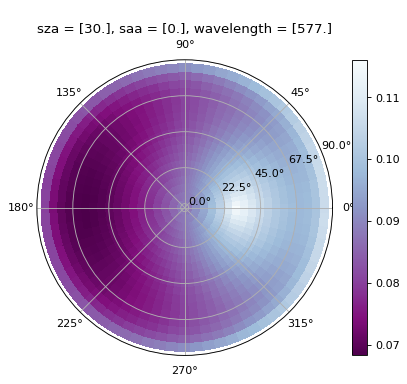

In [8]:
import matplotlib.pyplot as plt
brf = ds.brf
brf.ert.plot(kind="polar_pcolormesh")
plt.show()

It would also be interesting to visualise a slice of this data set in the principal plane. For that purpose, Eradiate provides a convience function which slices a hemispherical data set to extract a view in the principal plane \[[eradiate.util.view.pplane()](../../../rst/api_reference/generated/eradiate.util.view.pplane.rst#eradiate.util.view.pplane)\]. This function produces a new data set which can then be plotted as any other xarray data set:

In [9]:
from eradiate.util.view import pplane

pplane_data = pplane(ds.brf)
display(pplane_data)

<xarray.DataArray 'brf' (vza: 35, wavelength: 1)>
array([[0.08023491],
       [0.07362514],
       [0.07062375],
       [0.06914517],
       [0.06849207],
       [0.06824911],
       [0.06864982],
       [0.06928849],
       [0.07013113],
       [0.07133131],
       [0.07261598],
       [0.07432833],
       [0.07605456],
       [0.07804699],
       [0.08040026],
       [0.0826759 ],
       [0.08539347],
       [0.08823118],
       [0.09147475],
       [0.09491492],
       [0.09884997],
       [0.1036275 ],
       [0.10909312],
       [0.116049  ],
       [0.11217697],
       [0.10900141],
       [0.10593745],
       [0.10358896],
       [0.10142016],
       [0.09984718],
       [0.09850417],
       [0.09771992],
       [0.09820097],
       [0.10014967],
       [0.10607766]])
Coordinates:
    sza         float64 30.0
    saa         float64 0.0
  * vza         (vza) float64 -85.0 -80.0 -75.0 -70.0 ... 70.0 75.0 80.0 85.0
    vaa         (vza) float64 180.0 180.0 180.0 180.0 180.0 ... 0.0 0.0 0.0 0.0
  * wavelength  (wavelength) float64 577.0
Attributes:
    angle_convention:  eo_scene
    angular_domain:    hsphere

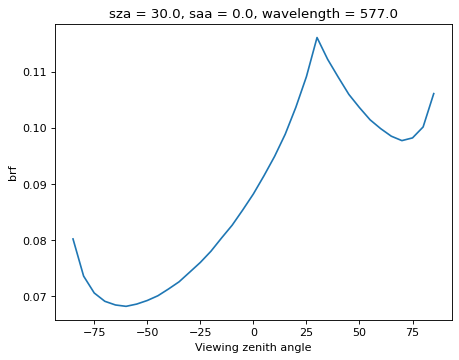

In [10]:
pplane_data.plot()
plt.show()